# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
%matplotlib inline
%run -i ../../tools/predict_functions_new.py

In [2]:
data_2014_2 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2014_2.csv', delimiter=';')
S_Data = data_2014_2.sort_values(by='PUNT_MATEMATICAS')

In [3]:
y_list=['DECIL_LECTURA_CRITICA', 'PUNT_LECTURA_CRITICA', 'DECIL_MATEMATICAS', 'PUNT_MATEMATICAS', 'DECIL_C_NATURALES',
        'PUNT_C_NATURALES', 'DECIL_SOCIALES_CIUDADANAS', 'PUNT_SOCIALES_CIUDADANAS', 'DECIL_INGLES', 'DESEMP_INGLES',
        'PUNT_INGLES', 'DECIL_RAZONA_CUANT', 'PUNT_RAZONA_CUANT', 'DECIL_COMP_CIUDADANA', 'PUNT_COMP_CIUDADANA', 
        'PUNT_GLOBAL', 'ESTU_PUESTO']
new_y_list = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
             'PUNT_RAZONA_CUANT', 'PUNT_COMP_CIUDADANA', 'PUNT_GLOBAL']
X_list = S_Data.columns.difference(y_list)

In [4]:
X = S_Data.filter(items = X_list)
Y = S_Data.filter(items = new_y_list)

## PUNT_MATEMATICAS

Mean Score: 8.85414394329
Takes: 11.297525405883789 seconds


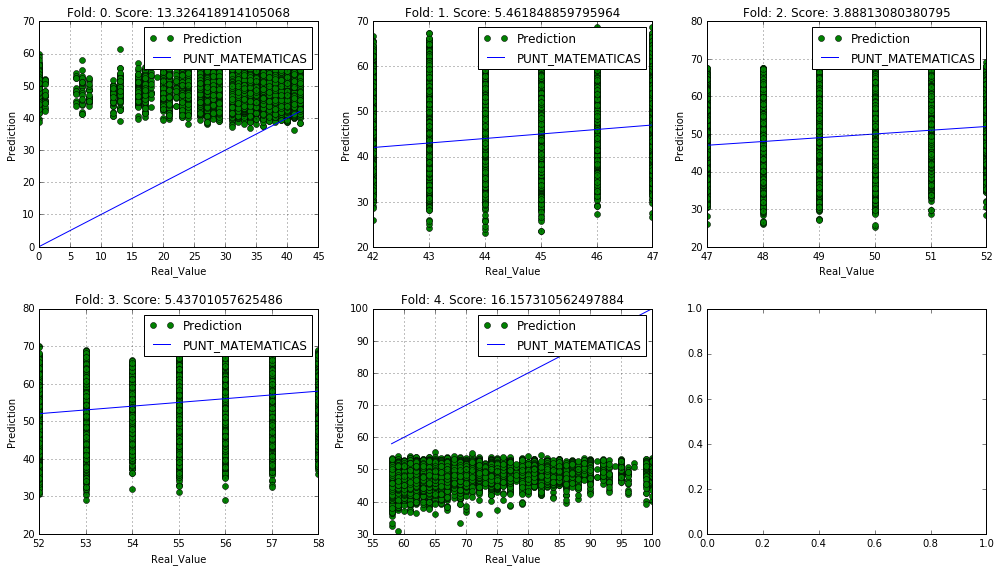

In [5]:
st = time()
kf = KFold(X.shape[0], n_folds=5)
Lm = LinearRegression()
plot_predictions_KF(Lm, 'PUNT_MATEMATICAS', X, Y, kf)
print('Takes:', time()-st, 'seconds')

With ShuffleSplit testsize: 0.2

Mean Score: 6.71323252504
takes: 12.602386236190796 seconds


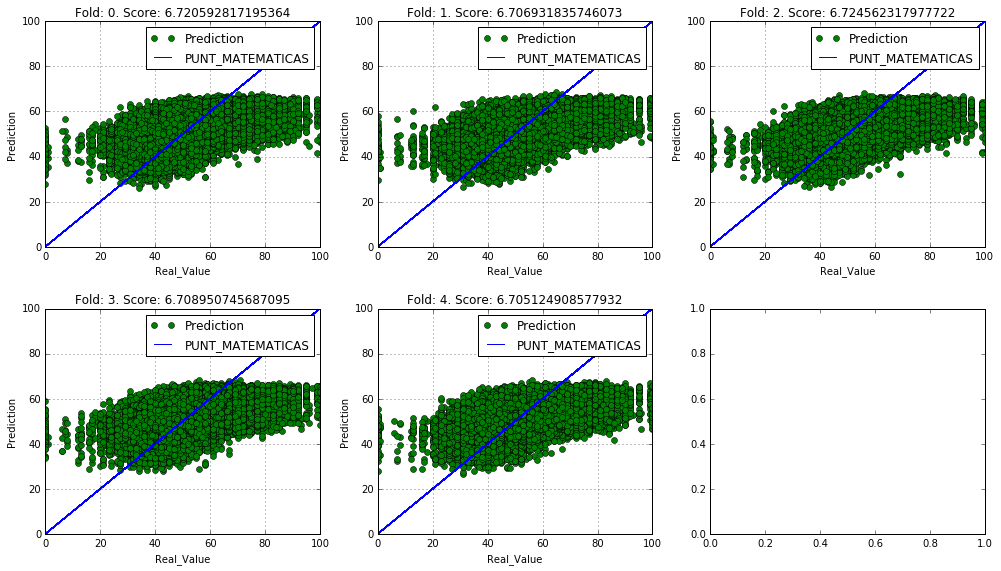

In [6]:
st = time()
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
Lr = LinearRegression()
plot_predictions_KF(Lr, 'PUNT_MATEMATICAS', X, Y, rs)
print('takes:',time()-st, 'seconds')

### Polynomial

EXP 2:

The Model with the Data raised to the power of 2 gives:
Mean Score: 8.88732515466


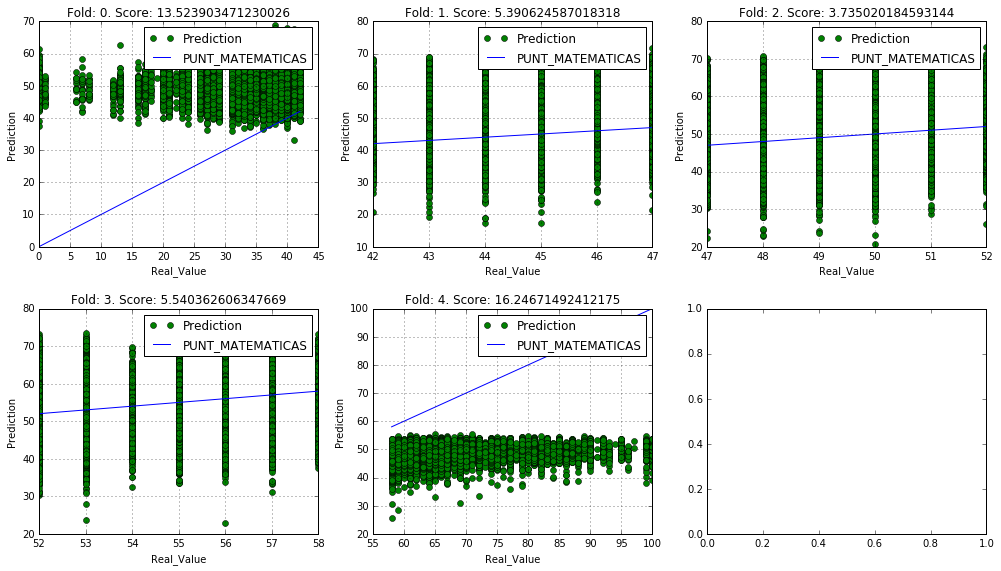

In [7]:
Lr = LinearRegression()
get_exp_prediction(Lr, 2, S_Data, 'PUNT_MATEMATICAS', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 6.75713113939
12.211396932601929


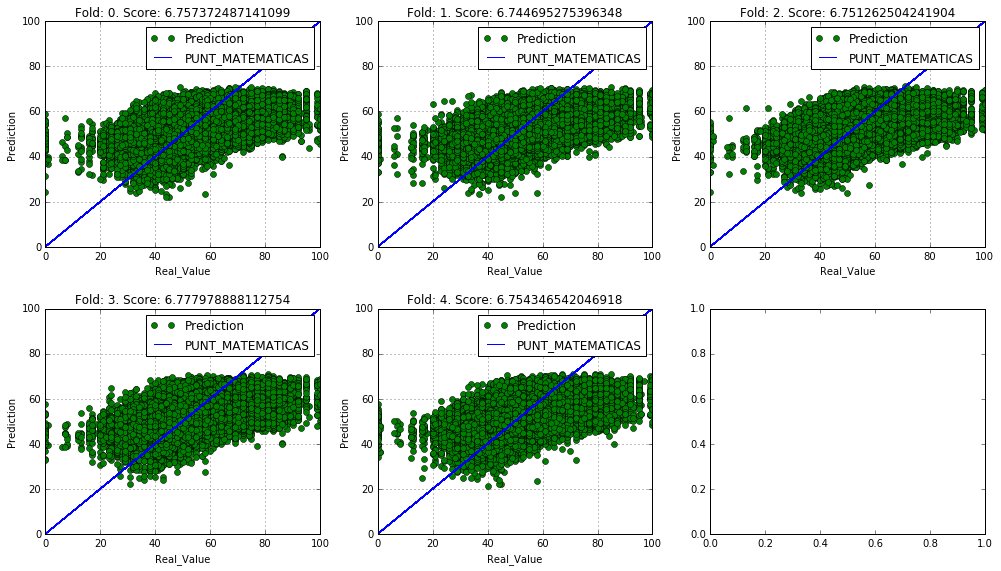

In [8]:
st = time()
Lr = LinearRegression()
get_exp_prediction(Lr, 2, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split=True)
print(time()-st)

Exp 3:

The Model with the Data raised to the power of 3 gives:
Mean Score: 8.95999912811
10.864614009857178


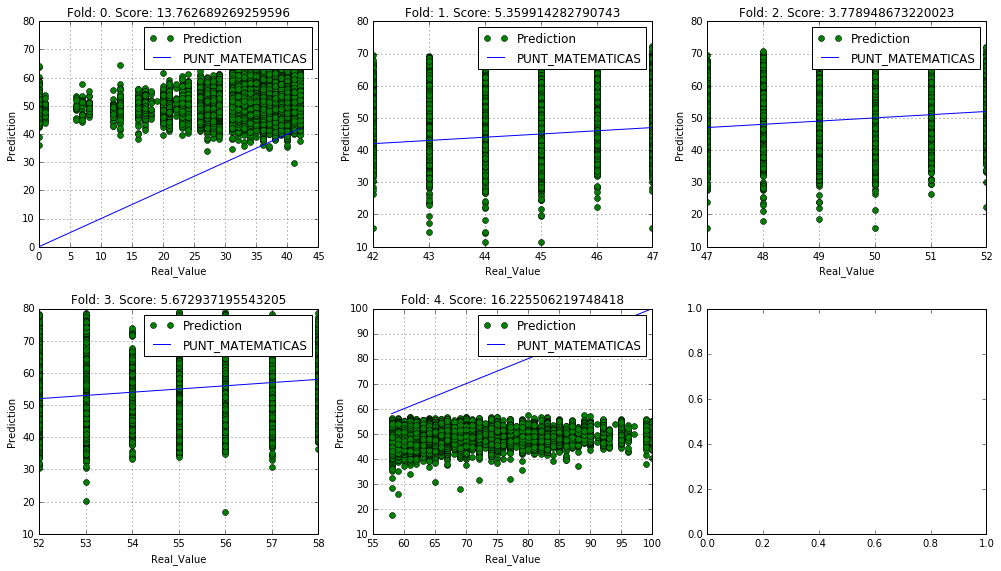

In [9]:
st = time()
Lr = LinearRegression()
get_exp_prediction(Lr, 3, S_Data, 'PUNT_MATEMATICAS', 5)
print(time()-st)

The Model with the Data raised to the power of 3 gives:
Mean Score: 7.01456609551
12.38629937171936


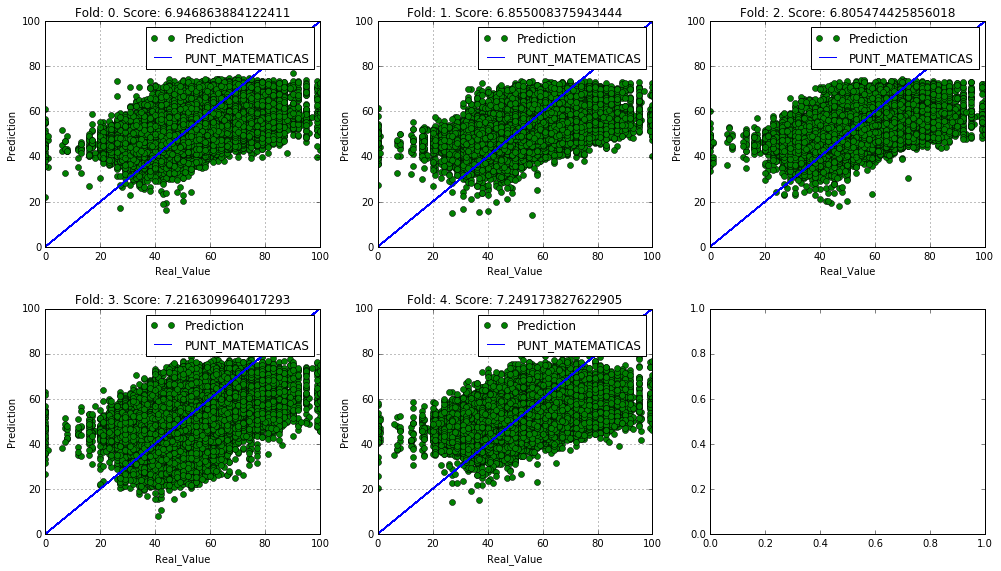

In [10]:
st = time()
Lr = LinearRegression()
get_exp_prediction(Lr, 3, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split=True)
print(time()-st)

### Polynomial Features

degree 2:

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 8.82526493449
Takes: 651.3021903038025 Seconds


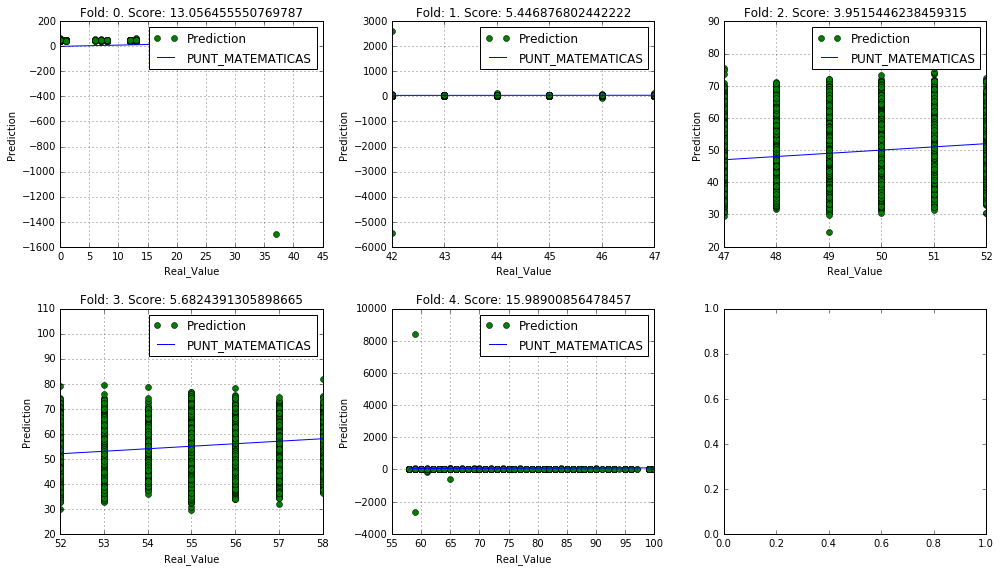

In [11]:
st=time()
Lr = LinearRegression()
get_Poly_prediction(Lr, 2, S_Data, 'PUNT_MATEMATICAS', 5)
print('Takes:', time()-st, 'Seconds')

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 6.78522491722
Takes: 654.147956609726 Seconds


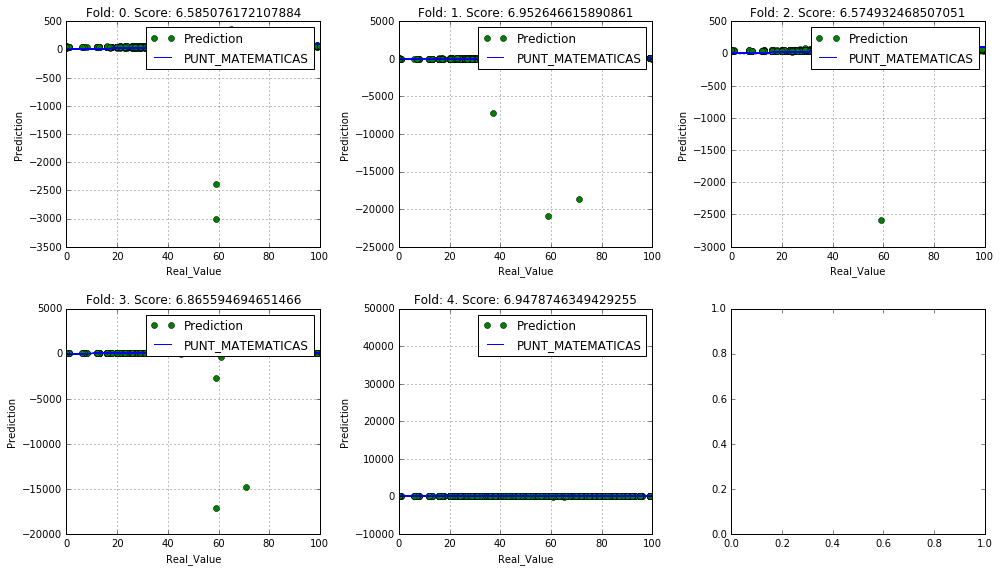

In [12]:
st=time()
Lr = LinearRegression()
get_Poly_prediction(Lr, 2, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split=True)
print('Takes:', time()-st, 'Seconds')

degree 3: <span style='color: red'>MEMORY ERROR</span>

In [28]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 3, S_Data, 'PUNT_MATEMATICAS', 5)

MemoryError: 

In [29]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 3, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split=True)

MemoryError: 

Trying with PCA

In [7]:
X.shape

(570750, 48)

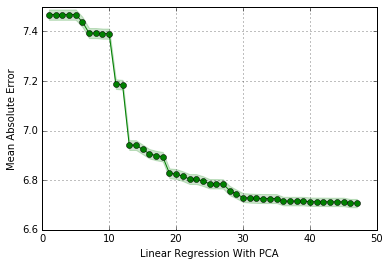

In [31]:
components = range(1,48)
cv = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2, random_state=0)
r = np.array([(np.mean(-j), np.std(-j)) for j in [cross_val_score(LinearRegression(n_jobs=4),
                                                                PCA(n_components=i).fit_transform(X),
                                                                Y['PUNT_MATEMATICAS'],
                                                                cv=cv,
                                                                scoring = 'mean_absolute_error')
                                               for i in components]])
plt.plot(components, r[:,0], "o-", color="green", label="test")
plt.grid()
plt.fill_between(components, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
plt.xlabel("Linear Regression With PCA")
plt.ylabel("Mean Absolute Error")

In [32]:
print('With', list(r[:,0]).index(min(r[:,0])), 'components we can find the min error of:', min(r[:,0]))

With 45 components we can find the min error of: 6.70765335979


Mean Score: 6.71425089335
This one takes: 21.143891096115112


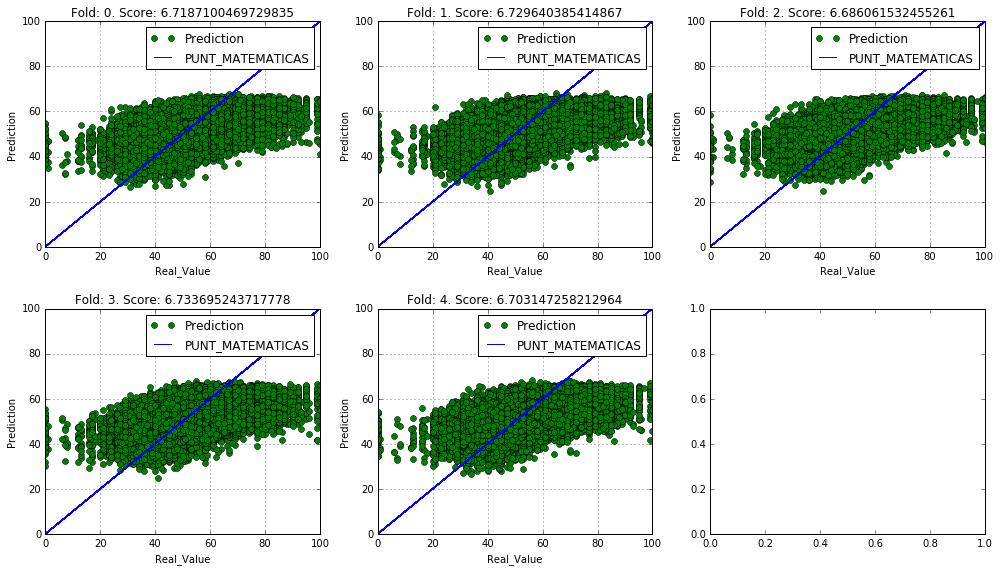

In [33]:
st = time()
pca = PCA(n_components=45)
pca_X = pca.fit_transform(X)
pca_X = pd.DataFrame(pca_X)
lr = LinearRegression(n_jobs=4)
rs = ShuffleSplit(n = pca_X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(lr, 'PUNT_MATEMATICAS', pca_X, Y, rs)
print('This one takes:', time()-st)

## Obtained Results

|          |    1   |      2     |EXP 2 |    |EXP 3|    |Poly 2|    |Poly 3 |     |PCA-45components|
|----------|-------:|-----------:|-----:|---:|----:|---:|-----:|---:|------:|----:|---------------:|
|          |Ordinary|ShuffleSplit|1     |2   |1    |2   |1     |2   |1      |2    |2               |
|MATEMATICA|8.85    |6.71        |8.88  |6.75|8.95 |7.01|8.82  |6.78|ERROR  |ERROR|6.71            |

The 3 best algorithms are:  



|                   |Score/time[SEG]    |Score/time[SEG]   |Score/time[SEG]    |Score/time[SEG]   |
|------------------:|------------------:|-----------------:|------------------:|-----------------:|
|**Algorithm**      |Normal ShuffleSplit|EXP 2+ShuffleSplit|Poly 2+ShuffleSplit|PCA(45 components)|
|**OLD DATA**       |6.71 / 12.60       |6.75 / 12.21      |6.78 / 654.14      |6.71/21.14        |


____

## Trying with the reduced X data

The best algorithms will be tested with this data.

In [5]:
New_X_list = ['FAMI_INTERNET', 'COLE_CARACTER', 'COLE_NATURALEZA', 'ESTU_ETNIA', 'ESTU_TIPO_CARRERA_DESEADA',
              'FAMI_PISOSHOGAR', 'ESTU_GENERO', 'ESTU_ZONA_RESIDE', 'ESTU_DEPTO_PRESENTACION', 'FAMI_CUARTOS_HOGAR',
              'ESTU_VECES_ESTADO', 'ESTU_COD_RESIDE_DEPTO', 'COLE_JORNADA', 'FAMI_OCUPA_PADRE', 'FAMI_OCUPA_MADRE',
              'FAMI_PERSONAS_HOGAR', 'FAMI_EDUCA_PADRE', 'ESTU_IES_MPIO_DESEADA', 'ESTU_NACIMIENTO_MES', 
              'ESTU_COD_PLANTEL', 'ESTU_MCPIO_PRESENTACION', 'FAMI_INGRESO_FMILIAR_MENSUAL', 'ESTU_IES_COD_DESEADA',
              'ESTU_NACIMIENTO_DIA', 'ESTU_EDAD', 'COLE_COD_ICFES', 'FAMI_NIVEL_SISBEN']
New_X = S_Data.filter(items = New_X_list)
New_Y = S_Data.filter(items = new_y_list)

Normal data with ShuffleSplit

Mean Score: 6.73727162981
takes: 9.971497058868408 seconds


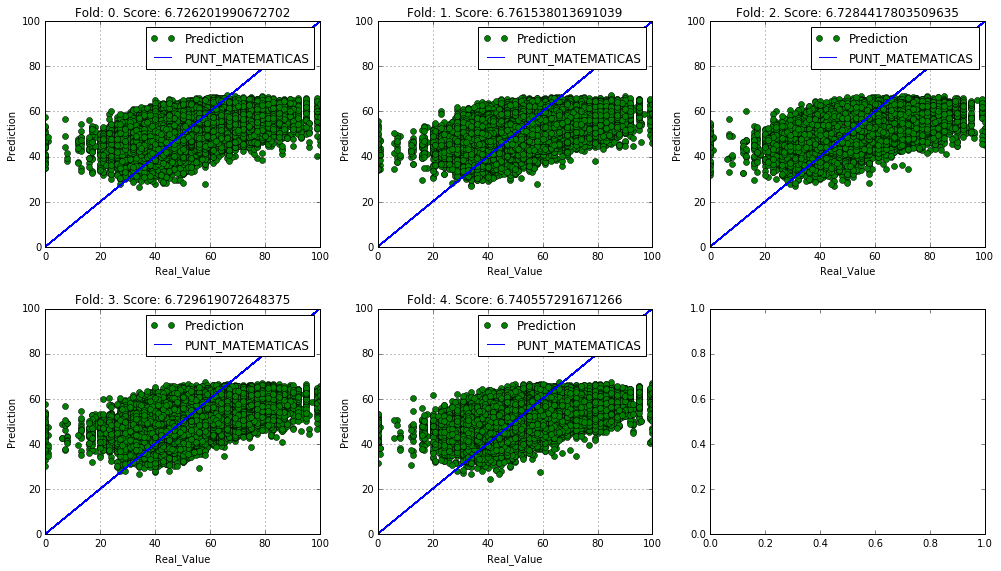

In [8]:
st = time()
rs = ShuffleSplit(n = New_X.shape[0], n_iter=5, test_size=0.2)
Lr = LinearRegression(n_jobs=4)
plot_predictions_KF(Lr, 'PUNT_MATEMATICAS', New_X, New_Y, rs)
print('takes:',time()-st, 'seconds')

EXP 2:

Mean Score: 6.77407664796
Takes: 11.037276029586792 seconds


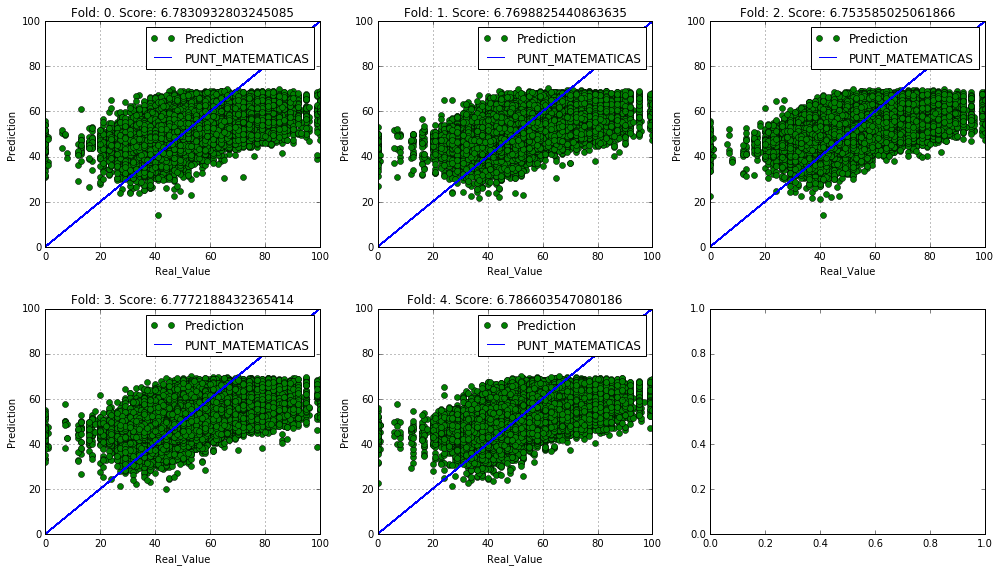

In [6]:
st = time()
Lr = LinearRegression(n_jobs=4)
exped_X = New_X**2
kf = ShuffleSplit(n = exped_X.shape[0], n_iter=5, test_size=(0.2))
plot_predictions_KF(Lr, 'PUNT_MATEMATICAS', exped_X, New_Y, kf)
print('Takes:', time()-st, 'seconds')

Polynomial degree 2 + ShuffleSplit

Mean Score: 6.58972891205
Takes: 155.09600281715393 Seconds


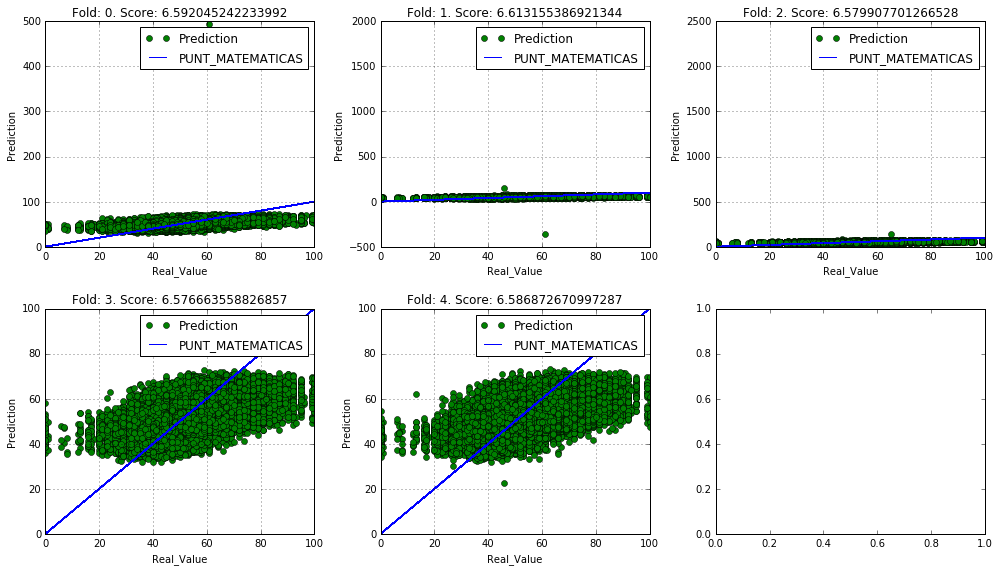

In [9]:
st=time()
Lr = LinearRegression(n_jobs=4)
Poly = PolynomialFeatures(degree = 2)
Poly_X = Poly.fit_transform(New_X)
Poly_X = pd.DataFrame(Poly_X)
kf = ShuffleSplit(n = Poly_X.shape[0], n_iter=5, test_size=(0.2))
plot_predictions_KF(Lr, 'PUNT_MATEMATICAS', Poly_X, New_Y, kf)
print('Takes:', time()-st, 'Seconds')

In [10]:
st = time()
pca = PCA(n_components=45)
pca_X = pca.fit_transform(New_X)
pca_X = pd.DataFrame(pca_X)
Lr = LinearRegression(n_jobs=4)
rs = ShuffleSplit(n = pca_X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(Lr, 'PUNT_MATEMATICAS', pca_X, New_Y, rs)
print('This one takes:', time()-st)

ValueError: n_components=45 invalid for n_features=27

## Obtained Results

|          |    1   |      2     |EXP 2 |    |EXP 3|    |Poly 2|    |Poly 3 |     |PCA-45components|
|----------|-------:|-----------:|-----:|---:|----:|---:|-----:|---:|------:|----:|---------------:|
|          |Ordinary|ShuffleSplit|1     |2   |1    |2   |1     |2   |1      |2    |2               |
|MATEMATICA|8.85    |6.71        |8.88  |6.75|8.95 |7.01|8.82  |6.78|ERROR  |ERROR|6.71            |

The 3 best algorithms are:  



|                   |Score/time[SEG]    |Score/time[SEG]   |Score/time[SEG]    |Score/time[SEG]   |
|------------------:|------------------:|-----------------:|------------------:|-----------------:|
|**Algorithm**      |Normal ShuffleSplit|EXP 2+ShuffleSplit|Poly 2+ShuffleSplit|PCA(45 components)|
|**OLD DATA**       |6.71 / 12.60       |6.75 / 12.21      |6.78 / 654.14      |6.71/21.14        |
|**NEW DATA**       |6.73 / 9.97        |6.77 / 11.03      |6.58 / 155.09      |ERROR(Less columns than components|

 

So according to the previous analysis, the **CHOSEN** way to predict will be the third one, with the data treated by a Polynomial Features Object with degree 2 and Shuffle Split.

## Learning Curves

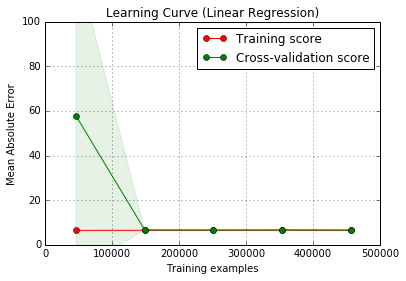

In [36]:
Poly = PolynomialFeatures(degree=2)
Poly_X = Poly.fit_transform(X)

title = "Learning Curve (Linear Regression)"
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n = Poly_X.shape[0], n_iter=5, test_size=0.2, random_state=0)

estimator = LinearRegression(n_jobs=4);
plot_learning_curve(estimator, title, Poly_X, Y['PUNT_MATEMATICAS'], ylim=(0, 100), cv=cv, n_jobs=4);

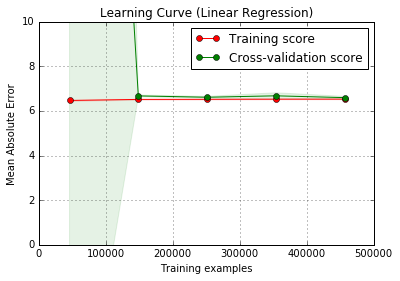

In [6]:
title = "Learning Curve (Linear Regression)"
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n = Poly_X.shape[0], n_iter=5, test_size=0.2, random_state=0)

estimator = LinearRegression(n_jobs=4);
plot_learning_curve(estimator, title, Poly_X, Y['PUNT_MATEMATICAS'], ylim=(0, 10), cv=cv, n_jobs=4);

# Conclusion

The **CHOSEN** way to predict is:

* Linear Regression + New Data transformed by a Polynomial Features object with degree 2 + ShuffleSplit 

Last Score Obtained: 

|Score[MAE]|Time[s]|
|---------:|------:|
|6.58      | 155.09|

Metric used: 

* For the Score was used the **Mean Absolute Error (MAE)** 
* For the time was used the **seconds unit (s)**